In [1]:
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt 
import numpy as np 

%matplotlib inline 

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print("Train:", len(X_train))
print("Test:", len(X_test))

Train: 60000
Test: 10000


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

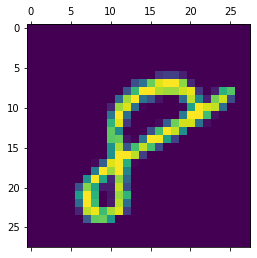

In [6]:
plt.matshow(X_train[-1])

In [7]:
X_train = X_train / 255
X_test = X_test / 255

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

X_train_flattened.shape

(60000, 784)

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/', histogram_freq=1)

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=20, callbacks=[tb_callback])

Epoch 1/20
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4715 - accuracy: 0.8767: 0s - loss: 0.5205 - accuracy: 0. - ETA: 0s - loss: 0.5086 - 
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3038 - accuracy: 0.9155: 0s - loss: 0
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2837 - accuracy: 0.9208: 1s - loss: 0.2860 - accu - ETA: 
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2736 - accuracy: 0.9231: 0s - loss: 0.2702 - accuracy:  - ETA: 0s - loss: 0.2733 - accu - ETA: 0s - loss: 0.2736 - accuracy: 0.92 - ETA: 0s - loss: 0.2738 - ac
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9253
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2618 - accuracy: 0.9269
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2584 - accuracy: 0.9279
Epoch 8/20
1875/1875 [==================

In [10]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 905us/step - loss: 0.2697 - accuracy: 0.9267


[0.2696806788444519, 0.9266999959945679]

In [11]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

array([1.3903064e-01, 3.9118230e-03, 9.9976140e-01, 1.8296808e-02,
       4.0002902e-13, 8.7331390e-01, 9.5356846e-01, 1.3399899e-18,
       2.9360354e-02, 4.3655445e-16], dtype=float32)

In [12]:
np.argmax(y_predicted[1])

2

In [13]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print('Predicted:', y_predicted_labels[:10])
print('True values:', list(y_test[:10]))

Predicted: [7, 2, 1, 0, 4, 1, 4, 9, 6, 9]
True values: [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


In [14]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

Text(69.0, 0.5, 'True')

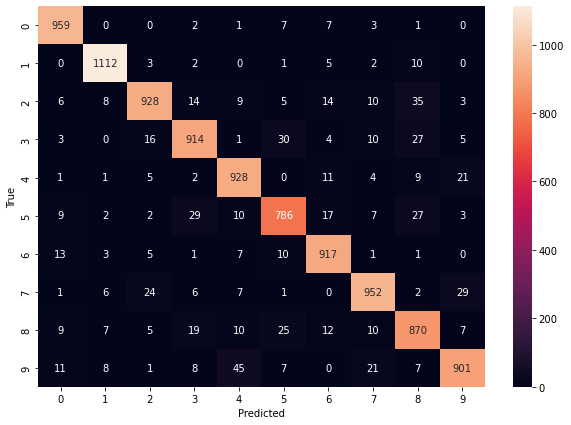

In [15]:
import seaborn as sns 

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

In [16]:
#Adcionando uma camada oculta ao modelo 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #Adcionando flatten, dispensa divisão
    keras.layers.Dense(100, activation='relu'),#Camada oculta, 100 
    keras.layers.Dense(10, activation='sigmoid') #Saída 
])
###Quando flatten adcionado, dispensa o parametro input_shape na entrada 
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/', histogram_freq=1)

model.compile(
    optimizer='adam', #Otimizador 
    loss='sparse_categorical_crossentropy', #Função de perca 
    metrics=['accuracy'] #Métrica de avaliação 
)

model.fit(X_train, y_train, epochs=20, callbacks=[tb_callback])

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2728 - accuracy: 0.9221
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1201 - accuracy: 0.9650
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0852 - accuracy: 0.9739: 0s - l
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0642 - accuracy: 0.9807: 1s - loss: 0 - ETA: 0s - loss: 0.064
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0505 - accuracy: 0.9851: 2s - loss: 0.0453 - ac - ETA: 2s - loss: 0.0460 - accu - ETA:  - ETA: 0s - loss: 0.0504 
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0411 - accuracy: 0.9875
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0327 - accuracy: 0.9897: 0s - loss: 0.032
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0273 - accuracy: 0.9912
Epoch 9/20
1875/1875 [========

In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1020 - accuracy: 0.9758


[0.1020200178027153, 0.9757999777793884]

Text(69.0, 0.5, 'True')

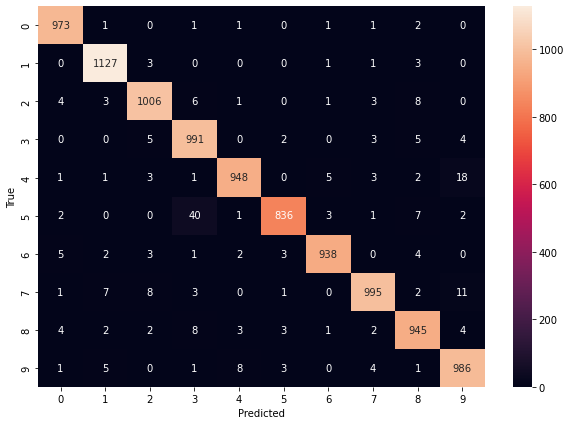

In [18]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')